#                AMERICAN EXPRESS- DEFAULT PREDICTION
The project involves some classification problem regarding the prediction of  a customer pay or does not pay back their credit card balance amount in the future based on their monthly customer profile .We have used a dataset of American Express.

# IMPORTING PACKAGES

In [1]:
!pip install imbalanced-learn==0.6.0
!pip install scikit-learn==0.22.1
!pip install feather-format
!pip install missingno
!pip install scipy
!pip install plotly
!pip install jupyter_plotly_dash

  Using cached scikit-learn-0.22.1.tar.gz (6.9 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\sampriti\anaconda3\lib\site-packages\scikit_learn-1.0.2.dist-info\
   from C:\Users\SAMPRITI\anaconda3\Lib\site-packages\~cikit_learn-1.0.2.dist-info
  Moving to c:\users\sampriti\anaconda3\lib\site-packages\sklearn\
   from C:\Users\SAMPRITI\anaconda3\Lib\site-packages\~klearn


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\SAMPRITI\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\SAMPRITI\\AppData\\Local\\Temp\\pip-install-_y23pcrn\\scikit-learn_afdcfe74c32643a491ece7047f7dd06d\\setup.py'"'"'; __file__='"'"'C:\\Users\\SAMPRITI\\AppData\\Local\\Temp\\pip-install-_y23pcrn\\scikit-learn_afdcfe74c32643a491ece7047f7dd06d\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\SAMPRITI\AppData\Local\Temp\pip-wheel-f9pc4w6e'
       cwd: C:\Users\SAMPRITI\AppData\Local\Temp\pip-install-_y23pcrn\scikit-learn_afdcfe74c32643a491ece7047f7dd06d\
  Complete output (35 lines):
  Partial import of sklearn during the build process.
  No module named 'numpy.distu

In [2]:
import os
import gc
import numpy as np
import feather
import pandas as pd
import missingno as msnum
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import feather

In [3]:
import warnings
warnings.filterwarnings("ignore")

# IMPORTING DATASET 
The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories:

D_* = Delinquency variables
S_* = Spend variables
P_* = Payment variables
B_* = Balance variables
R_* = Risk variables
with the following features being categorical:

[B_30, 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
As the csv files contain big data , so the data have been read in feather (.ftr format) files.

In [4]:
train_data=pd.read_feather("C:/Users/SAMPRITI/Desktop/AMEX/train_data.ftr") #this dataframe contains the values of the predictors.
train_data

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,0.979492,0.416016,0.020813,0.828125,0.003487,0.090759,0.005341,0.025146,...,NaN,NaN,NaN,0.006836,0.003679,0.000457,NaN,0.000906,0.001497,0.002775
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,0.984863,0.296631,0.007210,0.812500,0.005905,0.079895,0.002243,0.023697,...,NaN,NaN,NaN,0.003309,0.007095,0.007858,NaN,0.002777,0.008224,0.008858
5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,0.982910,0.444092,0.013153,0.815430,0.003456,0.100525,0.002111,0.012344,...,NaN,NaN,NaN,0.009956,0.009995,0.001088,NaN,0.005692,0.006775,0.005566
5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,0.969727,0.442627,0.009857,1.003906,0.005116,0.101807,0.009933,0.008575,...,NaN,NaN,NaN,0.005543,0.006565,0.009880,NaN,0.008125,0.001168,0.003983


In [5]:
train_labels=pd.read_csv("C:/Users/SAMPRITI/Desktop/AMEX/train_labels.csv") #this dataframe contains the values of the target variable.
train_labels

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [6]:
train_df = pd.merge(train_data, train_labels,left_index=True, right_index=True )
train_df

,customer_ID_x,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,customer_ID_y,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,1551c34606cba37f85f1d7f0a680a8dc14bc289c405cab...,2018-02-07,0.686523,0.005215,0.003897,0.812500,0.003065,NaN,0.003036,0.009125,...,NaN,0.000434,0.005451,0.008476,NaN,0.009254,0.004532,0.007130,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,1551c34606cba37f85f1d7f0a680a8dc14bc289c405cab...,2018-03-03,0.692871,0.009773,0.012192,0.818848,0.006393,0.237549,0.008118,0.005058,...,NaN,0.000905,0.009842,0.004440,NaN,0.009842,0.008240,0.002657,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,1551f04e8193124d0519bb2299cc6ec5981d70b7556dff...,2017-03-17,0.825195,0.008522,0.394287,0.031982,0.007904,0.150024,0.005413,0.713867,...,NaN,0.008934,0.002417,0.004253,NaN,0.006794,0.005676,0.000007,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,1551f04e8193124d0519bb2299cc6ec5981d70b7556dff...,2017-04-27,0.822754,0.002357,0.431641,0.053925,0.004414,0.155640,0.008865,0.494629,...,NaN,0.007828,0.003212,0.002804,NaN,0.008888,0.005692,0.009521,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


# DATA DESCRIPTION

In [7]:
train_df.shape

(458913, 192)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458913 entries, 0 to 458912
Columns: 192 entries, customer_ID_x to target
dtypes: category(11), float16(176), int64(2), object(3)
memory usage: 179.9+ MB


In [9]:
train_df.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
count,455178.000000,4.589130e+05,458913.000000,458742.000000,458913.000000,373520.000000,4.587420e+05,4.587420e+05,66593.000000,3.211660e+05,...,1.622900e+04,1.622900e+04,4.507540e+05,455605.000000,450754.000000,79329.000000,450754.000000,4.555900e+05,4.507540e+05,458913.000000
mean,NaN,NaN,0.125244,NaN,0.078979,NaN,6.088257e-02,1.337891e-01,0.182007,1.550293e-01,...,1.413727e-02,1.577148e-01,NaN,0.026474,NaN,0.392822,NaN,5.444336e-02,6.143188e-02,0.258934
std,0.000000,0.000000e+00,0.213257,0.000000,0.226196,0.000000,2.028809e-01,2.359619e-01,0.228394,2.161865e-01,...,9.509277e-02,2.597656e-01,0.000000e+00,0.145142,0.000000,0.239136,0.000000,1.878662e-01,1.898193e-01,0.438050
min,-0.383057,5.960464e-08,-0.899414,0.000002,0.000000,-0.347900,5.960464e-08,1.192093e-07,-0.000325,8.940697e-07,...,5.960464e-08,5.960464e-07,5.960464e-08,0.000000,0.000000,-0.014442,0.000000,5.960464e-08,5.960464e-08,0.000000
25%,0.477539,4.528046e-03,0.008858,0.103149,0.002903,0.127197,2.885818e-03,5.252838e-03,0.036102,4.229736e-02,...,2.550125e-03,3.435135e-03,3.036499e-03,0.002563,0.003038,0.197998,0.003044,2.754211e-03,3.030777e-03,0.000000
50%,0.692871,9.056091e-03,0.031616,0.814453,0.005787,0.163818,5.752563e-03,9.811401e-03,0.119019,8.801270e-02,...,5.107880e-03,6.904602e-03,6.069183e-03,0.005127,0.006073,0.384033,0.006077,5.516052e-03,6.053925e-03,0.000000
75%,0.864746,2.362061e-01,0.128906,1.001953,0.008667,0.258545,8.636475e-03,1.577148e-01,0.249023,1.832275e-01,...,7.587433e-03,5.009766e-01,9.109497e-03,0.007664,0.009109,0.563477,0.009102,8.270264e-03,9.101868e-03,1.000000
max,1.009766,5.332031e+00,1.324219,1.009766,3.000000,2.917969,6.796875e+00,1.625000e+00,4.191406,9.085938e+00,...,1.009766e+00,2.007812e+00,1.009766e+00,1.009766,1.253906,1.840820,1.009766,1.343750e+00,4.554688e+00,1.000000


# DATA PREPROCESSING AND CHECKING FOR DATA IMBALANCE

In [10]:
train_df=train_df.drop("customer_ID_x",axis=1)
train_df=train_df.drop("customer_ID_y",axis=1)
train_df

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,NaN,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,NaN,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,NaN,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0
3,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,NaN,...,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,0
4,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,NaN,...,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,2018-02-07,0.686523,0.005215,0.003897,0.812500,0.003065,NaN,0.003036,0.009125,NaN,...,NaN,NaN,0.000434,0.005451,0.008476,NaN,0.009254,0.004532,0.007130,0
458909,2018-03-03,0.692871,0.009773,0.012192,0.818848,0.006393,0.237549,0.008118,0.005058,NaN,...,NaN,NaN,0.000905,0.009842,0.004440,NaN,0.009842,0.008240,0.002657,0
458910,2017-03-17,0.825195,0.008522,0.394287,0.031982,0.007904,0.150024,0.005413,0.713867,NaN,...,NaN,NaN,0.008934,0.002417,0.004253,NaN,0.006794,0.005676,0.000007,0
458911,2017-04-27,0.822754,0.002357,0.431641,0.053925,0.004414,0.155640,0.008865,0.494629,NaN,...,NaN,NaN,0.007828,0.003212,0.002804,NaN,0.008888,0.005692,0.009521,1


In [11]:
train_df.shape

(458913, 190)

In [12]:
print(train_labels["target"].sum())
print(train_labels["target"].sum()/len(train_labels)*100,"%")   #checking or data imbalance

118828
25.89336105100531 %


# DEALING WITH MISSING VALUES

In [13]:
train_df.isnull().sum()

S_2            0
P_2         3735
D_39           0
B_1            0
B_2          171
           ...  
D_142     379584
D_143       8159
D_144       3323
D_145       8159
target         0
Length: 190, dtype: int64

In [14]:
tmp = train_df.isna().sum().mul(100).div(len(train_df)).sort_values(ascending=False) #checking the percentages of missing values for each predictor)

In [15]:
missingDF = pd.DataFrame(tmp).reset_index()
missingDF

,index,0
0,D_87,99.938768
1,D_88,99.880805
2,D_108,99.472013
3,D_111,99.392913
4,D_110,99.392913
...,...,...
185,B_24,0.000000
186,D_75,0.000000
187,P_4,0.000000
188,B_23,0.000000


<AxesSubplot:>

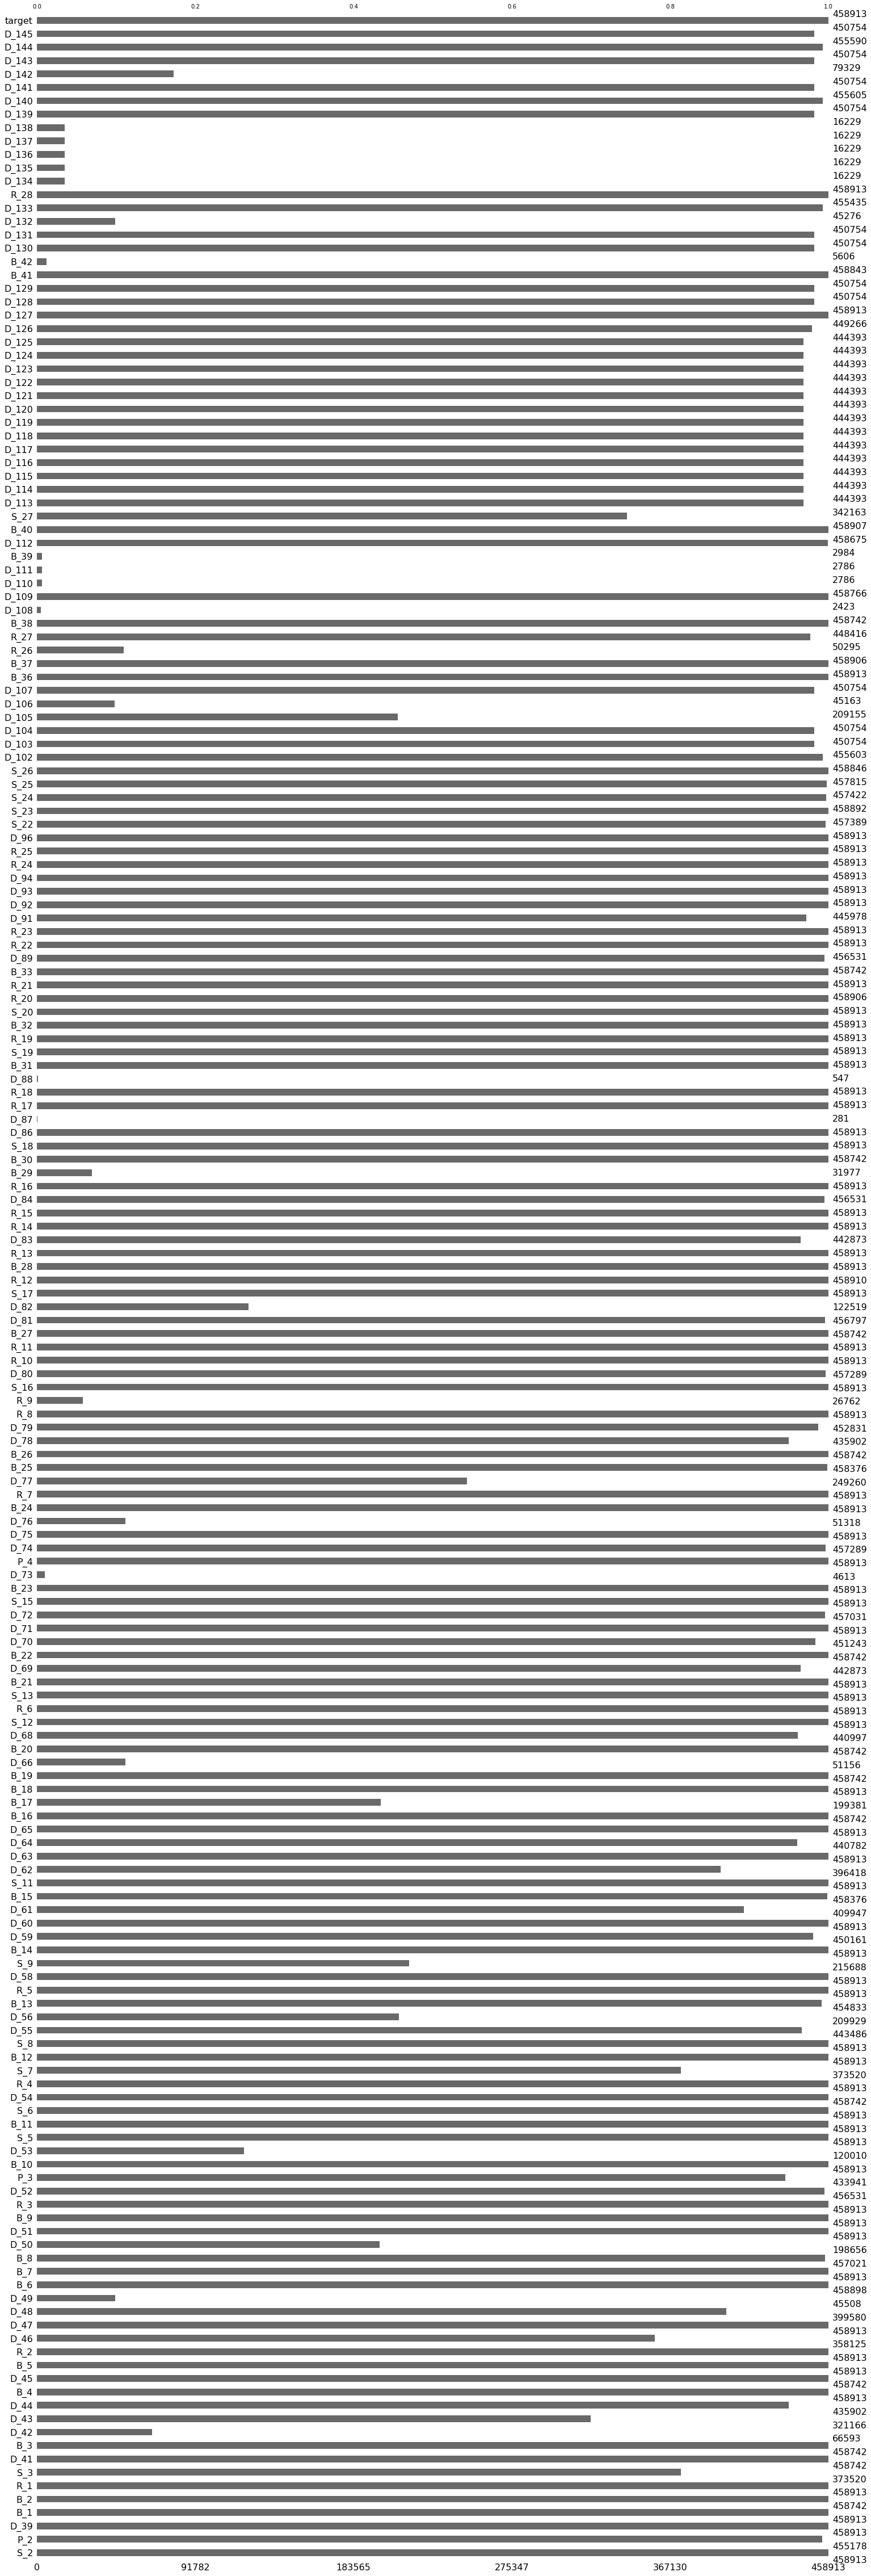

In [16]:
msnum.bar(train_df)

In [17]:
drop_cols = missingDF[missingDF[0]>70]["index"].values  #dropping columns having missing values>70%
print(drop_cols)

['D_87' 'D_88' 'D_108' 'D_111' 'D_110' 'B_39' 'D_73' 'B_42' 'D_136'
 'D_138' 'D_134' 'D_135' 'D_137' 'R_9' 'B_29' 'D_106' 'D_132' 'D_49'
 'R_26' 'D_66' 'D_76' 'D_42' 'D_142' 'D_53' 'D_82']


In [18]:
train_df

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,NaN,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,NaN,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,NaN,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0
3,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,NaN,...,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,0
4,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,NaN,...,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,2018-02-07,0.686523,0.005215,0.003897,0.812500,0.003065,NaN,0.003036,0.009125,NaN,...,NaN,NaN,0.000434,0.005451,0.008476,NaN,0.009254,0.004532,0.007130,0
458909,2018-03-03,0.692871,0.009773,0.012192,0.818848,0.006393,0.237549,0.008118,0.005058,NaN,...,NaN,NaN,0.000905,0.009842,0.004440,NaN,0.009842,0.008240,0.002657,0
458910,2017-03-17,0.825195,0.008522,0.394287,0.031982,0.007904,0.150024,0.005413,0.713867,NaN,...,NaN,NaN,0.008934,0.002417,0.004253,NaN,0.006794,0.005676,0.000007,0
458911,2017-04-27,0.822754,0.002357,0.431641,0.053925,0.004414,0.155640,0.008865,0.494629,NaN,...,NaN,NaN,0.007828,0.003212,0.002804,NaN,0.008888,0.005692,0.009521,1


In [19]:
train_df=train_df.drop(columns=drop_cols,axis=1)
train_df

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,NaN,...,0.005970,0.004345,0.001534,0.002426,0.003706,0.003819,0.000569,0.000610,0.002674,0
1,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,NaN,...,0.004837,0.007496,0.004932,0.003956,0.003166,0.005032,0.009575,0.005493,0.009216,0
2,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,NaN,...,0.005497,0.009224,0.009125,0.003269,0.007328,0.000427,0.003429,0.006985,0.002604,0
3,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,NaN,...,0.008263,0.007206,0.002409,0.006119,0.004517,0.003201,0.008423,0.006527,0.009598,0
4,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,NaN,...,0.004848,0.006313,0.004463,0.003672,0.004944,0.008888,0.001670,0.008125,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,2018-02-07,0.686523,0.005215,0.003897,0.812500,0.003065,NaN,0.003036,0.009125,0.110840,...,0.008102,0.007210,0.005436,0.000434,0.005451,0.008476,0.009254,0.004532,0.007130,0
458909,2018-03-03,0.692871,0.009773,0.012192,0.818848,0.006393,0.237549,0.008118,0.005058,0.106567,...,0.008713,0.006943,0.005287,0.000905,0.009842,0.004440,0.009842,0.008240,0.002657,0
458910,2017-03-17,0.825195,0.008522,0.394287,0.031982,0.007904,0.150024,0.005413,0.713867,NaN,...,0.006485,0.001168,0.004459,0.008934,0.002417,0.004253,0.006794,0.005676,0.000007,0
458911,2017-04-27,0.822754,0.002357,0.431641,0.053925,0.004414,0.155640,0.008865,0.494629,NaN,...,0.000070,0.000312,0.007851,0.007828,0.003212,0.002804,0.008888,0.005692,0.009521,1


# CATEGORICAL COLUMNS HANDLING

In [20]:
cols = train_df.columns
num_cols = train_df._get_numeric_data().columns

categorical_columns = list(set(cols) - set(num_cols)) #extracted the categorical columns
filtered_categorical_columns = list(set(train_df[categorical_columns])-{"S_2"})

In [21]:
train_df[filtered_categorical_columns]

,D_114,D_117,D_63,B_38,D_126,D_64,D_120,B_30,D_116,D_68
0,1.0,4.0,CR,2.0,1.0,O,0.0,0.0,0.0,6.0
1,1.0,4.0,CR,2.0,1.0,O,0.0,0.0,0.0,6.0
2,1.0,4.0,CR,2.0,1.0,O,0.0,0.0,0.0,6.0
3,1.0,4.0,CR,2.0,1.0,O,0.0,0.0,0.0,6.0
4,1.0,4.0,CR,2.0,1.0,O,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...
458908,1.0,4.0,CO,1.0,1.0,O,0.0,0.0,0.0,6.0
458909,1.0,-1.0,CO,1.0,1.0,R,0.0,0.0,0.0,6.0
458910,1.0,3.0,CO,5.0,1.0,O,0.0,1.0,0.0,4.0
458911,1.0,3.0,CO,5.0,1.0,O,0.0,0.0,0.0,4.0


In [22]:
train_df[filtered_categorical_columns].nunique()

D_114    2
D_117    7
D_63     6
B_38     7
D_126    3
D_64     4
D_120    2
B_30     3
D_116    2
D_68     7
dtype: int64

In [23]:
train_df[filtered_categorical_columns].isna().sum().mul(100).div(len(train_df)) #checking the percentage of missing values for categorical variables.

D_114    3.163998
D_117    3.163998
D_63     0.000000
B_38     0.037262
D_126    2.102141
D_64     3.950858
D_120    3.163998
B_30     0.037262
D_116    3.163998
D_68     3.904008
dtype: float64

In [24]:
for i in filtered_categorical_columns:
    print(train_df[i].value_counts())

1.0    275438
0.0    168955
Name: D_114, dtype: int64
-1.0    120520
3.0      96882
4.0      94802
2.0      55222
5.0      37912
6.0      28729
1.0      10326
Name: D_117, dtype: int64
CO    341440
CR     77580
CL     36215
XZ      2245
XM       870
XL       563
Name: D_63, dtype: int64
2.0    160959
3.0    104052
1.0     96342
5.0     37128
4.0     24884
7.0     21959
6.0     13418
Name: B_38, dtype: int64
1.0     353965
0.0      73789
-1.0     21512
Name: D_126, dtype: int64
O     242612
U     126306
R      68861
-1      3003
Name: D_64, dtype: int64
0.0    391569
1.0     52824
Name: D_120, dtype: int64
0.0    390288
1.0     63857
2.0      4597
Name: B_30, dtype: int64
0.0    443819
1.0       574
Name: D_116, dtype: int64
6.0    230640
5.0    100175
3.0     40317
4.0     39315
2.0     18611
1.0     10646
0.0      1293
Name: D_68, dtype: int64


# Dealing with Missing Values

In [25]:
train_df.isna().sum()

S_2          0
P_2       3735
D_39         0
B_1          0
B_2        171
          ... 
D_141     8159
D_143     8159
D_144     3323
D_145     8159
target       0
Length: 165, dtype: int64

In [26]:
imputer=SimpleImputer(strategy='most_frequent') #imputation of missing values in case of categorical variables
transformed_df=pd.DataFrame(imputer.fit_transform(train_df[filtered_categorical_columns]),columns=filtered_categorical_columns)
transformed_df.head()

,D_114,D_117,D_63,B_38,D_126,D_64,D_120,B_30,D_116,D_68
0,1.0,4.0,CR,2.0,1.0,O,0.0,0.0,0.0,6.0
1,1.0,4.0,CR,2.0,1.0,O,0.0,0.0,0.0,6.0
2,1.0,4.0,CR,2.0,1.0,O,0.0,0.0,0.0,6.0
3,1.0,4.0,CR,2.0,1.0,O,0.0,0.0,0.0,6.0
4,1.0,4.0,CR,2.0,1.0,O,0.0,0.0,0.0,6.0


In [27]:
train_df[filtered_categorical_columns] = transformed_df[filtered_categorical_columns]
train_df
print("Missing:",  train_df[filtered_categorical_columns].isnull().sum())

Missing: D_114    0
D_117    0
D_63     0
B_38     0
D_126    0
D_64     0
D_120    0
B_30     0
D_116    0
D_68     0
dtype: int64


In [28]:
train_df[num_cols]

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,NaN,0.000630,...,0.005970,0.004345,0.001534,0.002426,0.003706,0.003819,0.000569,0.000610,0.002674,0
1,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,NaN,0.002525,...,0.004837,0.007496,0.004932,0.003956,0.003166,0.005032,0.009575,0.005493,0.009216,0
2,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,NaN,0.007607,...,0.005497,0.009224,0.009125,0.003269,0.007328,0.000427,0.003429,0.006985,0.002604,0
3,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,NaN,0.006405,...,0.008263,0.007206,0.002409,0.006119,0.004517,0.003201,0.008423,0.006527,0.009598,0
4,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,NaN,0.007732,...,0.004848,0.006313,0.004463,0.003672,0.004944,0.008888,0.001670,0.008125,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,0.686523,0.005215,0.003897,0.812500,0.003065,NaN,0.003036,0.009125,0.110840,0.008148,...,0.008102,0.007210,0.005436,0.000434,0.005451,0.008476,0.009254,0.004532,0.007130,0
458909,0.692871,0.009773,0.012192,0.818848,0.006393,0.237549,0.008118,0.005058,0.106567,0.000109,...,0.008713,0.006943,0.005287,0.000905,0.009842,0.004440,0.009842,0.008240,0.002657,0
458910,0.825195,0.008522,0.394287,0.031982,0.007904,0.150024,0.005413,0.713867,NaN,0.004639,...,0.006485,0.001168,0.004459,0.008934,0.002417,0.004253,0.006794,0.005676,0.000007,0
458911,0.822754,0.002357,0.431641,0.053925,0.004414,0.155640,0.008865,0.494629,NaN,0.002239,...,0.000070,0.000312,0.007851,0.007828,0.003212,0.002804,0.008888,0.005692,0.009521,1


In [29]:
numeric_columns = train_df.select_dtypes(np.number).columns
train_df[numeric_columns]=train_df[numeric_columns].fillna(train_df[numeric_columns].median()) #imputation of missing values for numerical variables.
train_df[numeric_columns].isnull().sum()

P_2       0
D_39      0
B_1       0
B_2       0
R_1       0
         ..
D_141     0
D_143     0
D_144     0
D_145     0
target    0
Length: 154, dtype: int64

In [30]:
train_df.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,0.088013,...,0.005970,0.004345,0.001534,0.002426,0.003706,0.003819,0.000569,0.000610,0.002674,0
1,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,0.088013,...,0.004837,0.007496,0.004932,0.003956,0.003166,0.005032,0.009575,0.005493,0.009216,0
2,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,0.088013,...,0.005497,0.009224,0.009125,0.003269,0.007328,0.000427,0.003429,0.006985,0.002604,0
3,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,0.088013,...,0.008263,0.007206,0.002409,0.006119,0.004517,0.003201,0.008423,0.006527,0.009598,0
4,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,0.088013,...,0.004848,0.006313,0.004463,0.003672,0.004944,0.008888,0.001670,0.008125,0.009827,0


In [31]:
train_df=train_df.drop(columns=["S_2"],axis=1) #dropping the date column.
train_df

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,0.088013,0.000630,...,0.005970,0.004345,0.001534,0.002426,0.003706,0.003819,0.000569,0.000610,0.002674,0
1,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,0.088013,0.002525,...,0.004837,0.007496,0.004932,0.003956,0.003166,0.005032,0.009575,0.005493,0.009216,0
2,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,0.088013,0.007607,...,0.005497,0.009224,0.009125,0.003269,0.007328,0.000427,0.003429,0.006985,0.002604,0
3,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,0.088013,0.006405,...,0.008263,0.007206,0.002409,0.006119,0.004517,0.003201,0.008423,0.006527,0.009598,0
4,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,0.088013,0.007732,...,0.004848,0.006313,0.004463,0.003672,0.004944,0.008888,0.001670,0.008125,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,0.686523,0.005215,0.003897,0.812500,0.003065,0.163818,0.003036,0.009125,0.110840,0.008148,...,0.008102,0.007210,0.005436,0.000434,0.005451,0.008476,0.009254,0.004532,0.007130,0
458909,0.692871,0.009773,0.012192,0.818848,0.006393,0.237549,0.008118,0.005058,0.106567,0.000109,...,0.008713,0.006943,0.005287,0.000905,0.009842,0.004440,0.009842,0.008240,0.002657,0
458910,0.825195,0.008522,0.394287,0.031982,0.007904,0.150024,0.005413,0.713867,0.088013,0.004639,...,0.006485,0.001168,0.004459,0.008934,0.002417,0.004253,0.006794,0.005676,0.000007,0
458911,0.822754,0.002357,0.431641,0.053925,0.004414,0.155640,0.008865,0.494629,0.088013,0.002239,...,0.000070,0.000312,0.007851,0.007828,0.003212,0.002804,0.008888,0.005692,0.009521,1


In [32]:
train_df_1=pd.DataFrame({'D_63':['CO','CR','CL','XZ','XM','XL']})
print(train_df_1)
pd.get_dummies(train_df_1)

  D_63
0   CO
1   CR
2   CL
3   XZ
4   XM
5   XL


,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,1,0
5,0,0,0,1,0,0


In [33]:
train_df_2=pd.DataFrame({'D_64':['O','U','R','-1']})
print(train_df_2)
pd.get_dummies(train_df_2)

  D_64
0    O
1    U
2    R
3   -1


,D_64_-1,D_64_O,D_64_R,D_64_U
0,0,1,0,0
1,0,0,0,1
2,0,0,1,0
3,1,0,0,0


In [34]:
#dummification of the categorical variables
train_df=pd.get_dummies(train_df,columns=["D_63","D_64","D_114","D_116","D_120","D_117","D_126","B_30","D_68","B_38"])
train_df

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_68_4.0,D_68_5.0,D_68_6.0,B_38_1.0,B_38_2.0,B_38_3.0,B_38_4.0,B_38_5.0,B_38_6.0,B_38_7.0
0,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,0.088013,0.000630,...,0,0,1,0,1,0,0,0,0,0
1,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,0.088013,0.002525,...,0,0,1,0,1,0,0,0,0,0
2,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,0.088013,0.007607,...,0,0,1,0,1,0,0,0,0,0
3,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,0.088013,0.006405,...,0,0,1,0,1,0,0,0,0,0
4,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,0.088013,0.007732,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,0.686523,0.005215,0.003897,0.812500,0.003065,0.163818,0.003036,0.009125,0.110840,0.008148,...,0,0,1,1,0,0,0,0,0,0
458909,0.692871,0.009773,0.012192,0.818848,0.006393,0.237549,0.008118,0.005058,0.106567,0.000109,...,0,0,1,1,0,0,0,0,0,0
458910,0.825195,0.008522,0.394287,0.031982,0.007904,0.150024,0.005413,0.713867,0.088013,0.004639,...,1,0,0,0,0,0,0,1,0,0
458911,0.822754,0.002357,0.431641,0.053925,0.004414,0.155640,0.008865,0.494629,0.088013,0.002239,...,1,0,0,0,0,0,0,1,0,0


In [35]:
train_df[numeric_columns]

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,0.088013,0.000630,...,0.005970,0.004345,0.001534,0.002426,0.003706,0.003819,0.000569,0.000610,0.002674,0
1,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,0.088013,0.002525,...,0.004837,0.007496,0.004932,0.003956,0.003166,0.005032,0.009575,0.005493,0.009216,0
2,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,0.088013,0.007607,...,0.005497,0.009224,0.009125,0.003269,0.007328,0.000427,0.003429,0.006985,0.002604,0
3,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,0.088013,0.006405,...,0.008263,0.007206,0.002409,0.006119,0.004517,0.003201,0.008423,0.006527,0.009598,0
4,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,0.088013,0.007732,...,0.004848,0.006313,0.004463,0.003672,0.004944,0.008888,0.001670,0.008125,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,0.686523,0.005215,0.003897,0.812500,0.003065,0.163818,0.003036,0.009125,0.110840,0.008148,...,0.008102,0.007210,0.005436,0.000434,0.005451,0.008476,0.009254,0.004532,0.007130,0
458909,0.692871,0.009773,0.012192,0.818848,0.006393,0.237549,0.008118,0.005058,0.106567,0.000109,...,0.008713,0.006943,0.005287,0.000905,0.009842,0.004440,0.009842,0.008240,0.002657,0
458910,0.825195,0.008522,0.394287,0.031982,0.007904,0.150024,0.005413,0.713867,0.088013,0.004639,...,0.006485,0.001168,0.004459,0.008934,0.002417,0.004253,0.006794,0.005676,0.000007,0
458911,0.822754,0.002357,0.431641,0.053925,0.004414,0.155640,0.008865,0.494629,0.088013,0.002239,...,0.000070,0.000312,0.007851,0.007828,0.003212,0.002804,0.008888,0.005692,0.009521,1


In [36]:
train_df['target'].value_counts()

0    340085
1    118828
Name: target, dtype: int64

<AxesSubplot:ylabel='target'>

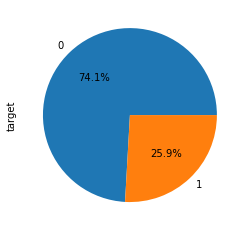

In [37]:
train_df.groupby('target')['target'].count().plot(kind='pie',y='target',autopct='%1.1f%%') #visualization of the distribution of target variables.

In [38]:
train_df=train_df.iloc[0:20000,:] #extracting the first 20000 rows for ease of computation.

In [39]:
train_df

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_68_4.0,D_68_5.0,D_68_6.0,B_38_1.0,B_38_2.0,B_38_3.0,B_38_4.0,B_38_5.0,B_38_6.0,B_38_7.0
0,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,0.088013,0.000630,...,0,0,1,0,1,0,0,0,0,0
1,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,0.088013,0.002525,...,0,0,1,0,1,0,0,0,0,0
2,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,0.088013,0.007607,...,0,0,1,0,1,0,0,0,0,0
3,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,0.088013,0.006405,...,0,0,1,0,1,0,0,0,0,0
4,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,0.088013,0.007732,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.871094,0.004101,0.004307,0.813477,0.001476,0.163818,0.005337,0.002361,0.088013,0.006184,...,0,1,0,0,1,0,0,0,0,0
19996,0.875488,0.001806,0.009064,0.813965,0.008064,0.163818,0.005791,0.003433,0.088013,0.006241,...,0,1,0,0,1,0,0,0,0,0
19997,0.901855,0.009224,0.007996,0.811523,0.003849,0.163818,0.002478,0.008629,0.088013,0.002817,...,0,1,0,1,0,0,0,0,0,0
19998,0.865234,0.006771,0.006317,0.813477,0.009018,0.163818,0.007828,0.005890,0.088013,0.003866,...,0,1,0,1,0,0,0,0,0,0


In [40]:
X=train_df.drop(['target'],axis=1) 
Y=train_df['target']

# FEATURE SELECTION

In [41]:
from sklearn.feature_selection import VarianceThreshold #selecting variables by fixing a variance threshold value.
X_columns=X.columns
var_thresh = VarianceThreshold(threshold=0.1)
var_thresh.fit(X)
X_columns = X_columns[var_thresh.get_support()]
X = pd.DataFrame(var_thresh.transform(X), columns = X_columns)
X

,B_2,B_5,B_6,B_8,B_10,S_5,S_6,B_12,B_13,D_60,...,D_117_4.0,D_126_0.0,D_126_1.0,B_30_0.0,B_30_1.0,D_68_5.0,D_68_6.0,B_38_1.0,B_38_2.0,B_38_3.0
0,1.006836,0.170654,0.063904,0.006466,0.096191,0.023376,0.008324,0.148315,0.118103,0.199585,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.000977,0.113220,0.065247,0.001614,0.099792,0.030594,0.002481,0.143555,0.118713,0.151367,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.009766,0.060486,0.066956,0.005127,0.134033,0.048370,0.000530,0.136963,0.114563,0.305908,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.002930,0.166748,0.083740,0.001417,0.134399,0.030060,0.000783,0.129028,0.120728,0.273438,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.000977,0.143677,0.075928,0.001199,0.121521,0.054230,0.006699,0.129517,0.095154,0.233154,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.813477,0.001197,0.199097,0.006721,0.298340,0.007965,1.003906,0.012543,0.005077,0.005878,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
19996,0.813965,0.007820,0.158569,0.002171,0.300537,0.004227,1.002930,0.009270,0.008377,0.006413,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
19997,0.811523,0.007347,0.191650,0.008217,0.295654,0.002775,1.000977,0.012978,0.001515,0.007687,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
19998,0.813477,0.003382,0.177002,0.004658,0.299072,0.000337,1.000977,0.011353,0.002037,0.007698,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [42]:
from sklearn.feature_selection import SelectKBest,f_classif #selecting features by the method of selectbestclassifier.
X1=X.columns
fs = SelectKBest(f_classif, k=30) 
fs.fit(X,Y)
X1 = X1[fs.get_support()]
X= pd.DataFrame(fs.transform(X),columns=X1)
X

,B_8,S_5,S_6,D_60,D_65,B_16,B_20,B_21,D_69,D_71,...,D_130,D_64_O,D_64_R,D_117_-1.0,D_117_2.0,D_117_3.0,D_68_5.0,D_68_6.0,B_38_1.0,B_38_2.0
0,0.006466,0.023376,0.008324,0.199585,0.007126,0.007664,0.004730,0.002644,0.009010,0.119385,...,0.002052,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.001614,0.030594,0.002481,0.151367,0.002413,0.007149,0.003880,0.004192,0.007843,0.140625,...,0.001034,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.005127,0.048370,0.000530,0.305908,0.001878,0.003637,0.004578,0.001336,0.006023,0.075867,...,0.005680,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.001417,0.030060,0.000783,0.273438,0.005898,0.005894,0.005207,0.008713,0.005272,0.150269,...,0.007107,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.001199,0.054230,0.006699,0.233154,0.009476,0.001715,0.005852,0.006821,0.000152,0.096436,...,0.009682,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.006721,0.007965,1.003906,0.005878,0.009872,0.009117,0.009521,0.007793,0.000351,0.013985,...,0.009903,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
19996,0.002171,0.004227,1.002930,0.006413,0.009560,0.005596,0.008629,0.004177,0.005207,0.017654,...,0.005306,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
19997,0.008217,0.002775,1.000977,0.007687,0.004215,0.000725,0.008675,0.007828,0.001896,0.019974,...,0.005951,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
19998,0.004658,0.000337,1.000977,0.007698,0.004879,0.005234,0.002594,0.009308,0.009766,0.013977,...,0.003387,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


# TRAIN-TEST SPLITTING

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=44) #splitting the dataset into train data (70%) and test data(30%).

# SMOTE FOR DEALING WITH DATA IMBALANCE

In [44]:
from imblearn.over_sampling import SMOTE #synthesizing the minority class(here '1') by SMOTE.
sm=SMOTE(random_state=42)
x_res,y_res=sm.fit_sample(x_train,y_train)

In [45]:
y_res.value_counts()

0    10304
1    10304
Name: target, dtype: int64

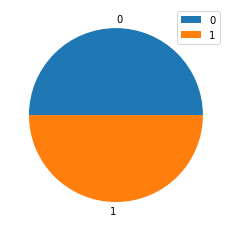

In [46]:
my_labels=[0,1]
plt.pie(y_res.value_counts(),labels=my_labels)
plt.legend()

For stratifying the predictor space, we adopted the tree-based methods and boosting method. Our baseline model was Classification tree.
# Classification Tree 

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=0 )
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Confusion Matrix:\n ", confusion_matrix(y_test, y_pred))
print ("Accuracy :\n ",accuracy_score(y_test,y_pred)*100)
print("Report : \n", classification_report(y_test, y_pred))       

Confusion Matrix:
  [[3161 1266]
 [1127  446]]
Accuracy :
  60.11666666666666
Report : 
               precision    recall  f1-score   support

           0       0.74      0.71      0.73      4427
           1       0.26      0.28      0.27      1573

    accuracy                           0.60      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       0.61      0.60      0.61      6000



In [48]:
from sklearn import metrics
auc1 = metrics.roc_auc_score(y_test, y_pred)
print("the auc score is %.3f"%auc1)

the auc score is 0.499


In [51]:
y_pred1=clf.predict_proba(x_test)
y_pred1

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [53]:
from sklearn.tree import DecisionTreeClassifier #hyper parameter tuning of the classification tree.
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
param_dist = {"max_depth": [30,40,50],
              "max_features": [15,25,35],
              "min_samples_leaf": [3,4,5],
              "criterion": ["gini", "entropy"],
              "splitter":["best","random"]}
clf=DecisionTreeClassifier(random_state=0)
clf_cv = GridSearchCV(clf, param_dist, cv=6,scoring='accuracy')
clf_cv.fit(x_train,y_train)
clf_pred=clf_cv.predict(x_test)
print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))
print ("Accuracy :\n ",accuracy_score(y_test,clf_pred)*100)   

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 30, 'max_features': 15, 'min_samples_leaf': 4, 'splitter': 'random'}
Best score is 0.6568563840617211
Accuracy :
  64.56666666666668


In [54]:
from sklearn import metrics
auc2 = metrics.roc_auc_score(y_test, clf_pred)
print("the auc score is %.3f"%auc2)

the auc score is 0.496


In [57]:
feature_importance=clf.feature_importances_ #variable importance measure of the features used in the classification tree.
detail={'features':X1,'feature-importance':feature_importance}
tvi=pd.DataFrame(detail)
tvi_final=tvi.sort_values(by='feature-importance',ascending=False)
tvi_final

,features,feature-importance
4,D_65,0.057408
12,S_16,0.057197
7,B_21,0.053504
3,D_60,0.051355
11,B_26,0.050496
6,B_20,0.049581
10,R_7,0.049432
9,D_71,0.048264
20,D_130,0.048124
5,B_16,0.046533


In [58]:
drop_cols1 = tvi_final[tvi_final["feature-importance"]<0.035]["features"].values  #dropping the least important feadtures.
print(drop_cols1)

['S_22' 'D_117_2.0' 'D_117_-1.0' 'D_64_O' 'B_38_1.0' 'D_68_6.0' 'D_68_5.0'
 'D_117_3.0' 'D_64_R' 'B_38_2.0']


In [59]:
x_train1=x_train.drop(columns=drop_cols1,axis=1)

In [60]:
x_test1=x_test.drop(columns=drop_cols1,axis=1)

In [61]:
x_train1

,B_8,S_5,S_6,D_60,D_65,B_16,B_20,B_21,D_69,D_71,R_7,B_26,S_16,R_20,S_23,S_24,B_40,D_128,D_129,D_130
14109,0.004604,0.002090,0.000738,1.001953,0.007099,0.086670,0.004894,0.004803,0.004807,0.004658,0.009995,0.006714,0.001103,0.004547,0.136719,0.958984,0.006359,1.001953,0.005608,0.004723
3067,0.003613,0.004997,1.002930,0.001680,0.007812,0.001855,0.007477,0.003904,0.004108,0.010170,0.009384,0.000233,0.002430,0.002876,0.131470,0.086121,0.023514,1.006836,1.004883,0.006878
3410,1.001953,0.008949,0.001251,0.944336,0.001001,0.088806,0.006859,0.003485,0.005192,0.011215,0.002798,0.007030,0.002438,0.008629,0.134888,0.962891,0.027588,0.006432,0.006458,0.002964
4860,1.003906,0.044128,0.007004,0.149658,0.007881,0.585449,0.353760,0.001516,6.566406,0.014000,0.003548,0.000386,0.004772,0.002113,0.458496,0.964355,0.181396,0.007957,0.000233,0.004860
5665,0.007389,0.085144,0.003635,0.921387,0.001656,0.250244,0.007515,0.003286,0.003599,0.044708,0.007008,0.007030,0.009209,0.007790,0.134155,0.958008,0.005123,0.000096,0.008949,0.002735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,0.006607,0.005810,1.003906,0.002718,0.002199,0.171875,0.001810,0.001571,0.007664,0.018219,0.004929,0.009529,0.002384,0.008369,0.138672,0.077881,0.022751,1.001953,1.005859,0.009422
18528,0.004169,0.001628,1.000977,0.007164,0.005947,0.007221,0.001353,0.003218,0.005291,0.013153,0.001583,0.007256,0.004620,0.001782,0.133423,0.083618,0.021286,0.008896,0.004303,0.003136
16955,1.002930,0.055603,0.009804,0.392822,0.000995,1.007812,1.002930,0.769043,0.009453,0.006855,0.193237,0.009773,1.099609,0.000102,0.572754,0.995605,0.628418,0.005920,0.000293,1.002930
3491,0.001406,0.030212,0.008690,0.070862,0.001845,0.250000,0.000587,0.008614,0.008003,0.007103,0.003380,0.009514,0.008720,0.004131,0.131226,0.959961,0.460449,1.005859,1.009766,0.007469


In [65]:
clf1=DecisionTreeClassifier(random_state=0, criterion = 'entropy', max_depth =20 , max_features = 15 , splitter = 'random')
clf1.fit(x_train1,y_train) #fitted the tree again with the important features and predicted.
clf_pred1=clf1.predict(x_test1)
print("Confusion Matrix:\n ", confusion_matrix(y_test, clf_pred1))
print ("Accuracy :\n ",accuracy_score(y_test,clf_pred1)*100)
print("Report : \n", classification_report(y_test, clf_pred1))     

Confusion Matrix:
  [[4307  120]
 [1533   40]]
Accuracy :
  72.45
Report : 
               precision    recall  f1-score   support

           0       0.74      0.97      0.84      4427
           1       0.25      0.03      0.05      1573

    accuracy                           0.72      6000
   macro avg       0.49      0.50      0.44      6000
weighted avg       0.61      0.72      0.63      6000



In [66]:
auc3 = metrics.roc_auc_score(y_test, clf_pred1)
print("the auc score is %.3f"%auc3)

the auc score is 0.499


# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=0,criterion ='entropy', max_features = 20 , min_samples_split = 10, min_samples_leaf=8, min_impurity_decrease =0.2, class_weight={0:3,1:1})
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)   
print("Confusion Matrix:\n ", confusion_matrix(y_test, rf_pred))
print ("Accuracy :\n ",accuracy_score(y_test,rf_pred)*100)
print("Report : \n", classification_report(y_test, rf_pred))        

Confusion Matrix:
  [[4427    0]
 [1573    0]]
Accuracy :
  73.78333333333333
Report : 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      4427
           1       0.00      0.00      0.00      1573

    accuracy                           0.74      6000
   macro avg       0.37      0.50      0.42      6000
weighted avg       0.54      0.74      0.63      6000



In [68]:
auc4 = metrics.roc_auc_score(y_test, rf_pred)
print("the auc score is %.3f"%auc4)

the auc score is 0.500


In [69]:
col_names=x_train.columns
col_names

Index(['B_8', 'S_5', 'S_6', 'D_60', 'D_65', 'B_16', 'B_20', 'B_21', 'D_69',
       'D_71', 'R_7', 'B_26', 'S_16', 'R_20', 'S_22', 'S_23', 'S_24', 'B_40',
       'D_128', 'D_129', 'D_130', 'D_64_O', 'D_64_R', 'D_117_-1.0',
       'D_117_2.0', 'D_117_3.0', 'D_68_5.0', 'D_68_6.0', 'B_38_1.0',
       'B_38_2.0'],
      dtype='object')

In [71]:
from sklearn.ensemble import RandomForestClassifier #hyper parameter tuning of Random forest classifier.
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param={"max_depth": [3,5,7],
       "max_features": randint(1, 11),
              "min_samples_split": randint(2, 11),
              "min_samples_leaf": randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
      "oob_score":[True,False]}
rf1=RandomForestClassifier(n_estimators=50,random_state=0)
rf1_cv=RandomizedSearchCV(rf1,param,cv=5)
rf1_cv.fit(x_train,y_train)
rf_pred1=rf1_cv.predict(x_test)
print("Tuned Decision Tree Parameters: {}".format(rf1_cv.best_params_))
print("Best score is {}".format(rf1_cv.best_score_))
print("Confusion Matrix:\n ", confusion_matrix(y_test, rf_pred1))
print ("Accuracy :\n ",accuracy_score(y_test,rf_pred1)*100)
print("Report : \n", classification_report(y_test, rf_pred1)) 

Tuned Decision Tree Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 4, 'min_samples_split': 10, 'oob_score': False}
Best score is 0.7360714285714286
Confusion Matrix:
  [[4424    3]
 [1572    1]]
Accuracy :
  73.75
Report : 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      4427
           1       0.25      0.00      0.00      1573

    accuracy                           0.74      6000
   macro avg       0.49      0.50      0.43      6000
weighted avg       0.61      0.74      0.63      6000



# XGBoost

In [49]:
import sys #importing xgboost.

!{sys.executable} -m pip install xgboost

In [50]:
import xgboost
from xgboost import XGBClassifier
xg_clf = XGBClassifier(n_estimators=35, max_depth= 8, max_leaves = 25,learning_rate=0.03,gamma = 0.8)
xg_clf.fit(x_train,y_train)
preds = xg_clf.predict(x_test)

In [97]:
from sklearn import metrics
auc6 = metrics.roc_auc_score(y_test, preds)
print("the auc score is %.3f"%auc6)

the auc score is 0.500


In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print("Confusion Matrix:\n ", confusion_matrix(y_test, preds))
print ("Accuracy :\n ",accuracy_score(y_test,preds)*100)
print("Report : \n", classification_report(y_test, preds))  

Confusion Matrix:
  [[4422    5]
 [1571    2]]
Accuracy :
  73.73333333333333
Report : 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      4427
           1       0.29      0.00      0.00      1573

    accuracy                           0.74      6000
   macro avg       0.51      0.50      0.43      6000
weighted avg       0.62      0.74      0.63      6000



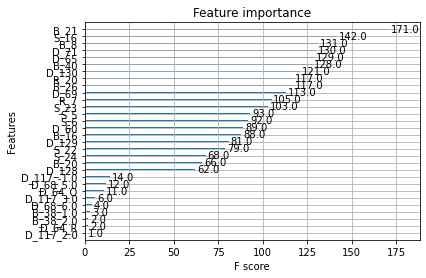

In [99]:
xgboost.plot_importance(xg_clf) # plotting variable importance measure of xgboost classifier.
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [101]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(XGBClassifier(), x_train,y_train, cv=10)
scores

array([0.70785714, 0.71285714, 0.71857143, 0.72142857, 0.70642857,
       0.72142857, 0.71785714, 0.71      , 0.70357143, 0.69785714])

In [102]:
print("cross validation score is %.2f%%" %(scores.mean()*100))

cross validation score is 71.18%


In [103]:
feature_importance=xg_clf.feature_importances_
detail={'features':col_names,'feature-importance':feature_importance}
xgvi=pd.DataFrame(detail)
xgvi_final=xgvi.sort_values(by='feature-importance',ascending=False)
xgvi_final

,features,feature-importance
26,D_68_5.0,0.044505
21,D_64_O,0.039257
19,D_129,0.038888
14,S_22,0.037676
3,D_60,0.037071
25,D_117_3.0,0.036936
23,D_117_-1.0,0.036390
17,B_40,0.036109
18,D_128,0.035897
7,B_21,0.035818


In [53]:
from sklearn.model_selection import RandomizedSearchCV #hyper parameter tuning of xgboost.
from scipy.stats import randint
params={'n_estimators':range(1,50), 
        'learning_rate':[0.01, 0.02, 0.03, 0.04],
        'max_depth':[2, 4, 5, 6, 8],
       'gamma':[0.1,0.2,0.6,0.8],
       'max_leaves':[10,15,20,25]}
xg_clf=XGBClassifier()
randomcv=RandomizedSearchCV(xg_clf,params,cv=2)
randomcv.fit(x_train,y_train)
y_pred=randomcv.predict(x_test)
print("Tuned Decision Tree Parameters: {}".format(randomcv.best_params_))
print("Best score is {}".format(randomcv.best_score_))
print("Confusion Matrix:\n ", confusion_matrix(y_test, y_pred))
print ("Accuracy :\n ",accuracy_score(y_test,y_pred)*100)
print("Report : \n", classification_report(y_test, y_pred))     

Tuned Decision Tree Parameters: {'n_estimators': 17, 'max_leaves': 10, 'max_depth': 2, 'learning_rate': 0.01, 'gamma': 0.8}
Best score is 0.7360714285714285
Confusion Matrix:
  [[4422    5]
 [1572    1]]
Accuracy :
  73.71666666666667
Report : 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      4427
           1       0.17      0.00      0.00      1573

    accuracy                           0.74      6000
   macro avg       0.45      0.50      0.42      6000
weighted avg       0.59      0.74      0.63      6000



In [104]:
drop_cols3 = xgvi_final[xgvi_final["feature-importance"]<0.0323]["features"].values  
print(drop_cols3)

['S_6' 'D_69' 'B_38_2.0' 'D_130' 'S_16' 'D_117_2.0' 'D_68_6.0' 'D_64_R']


In [105]:
x_train=x_train.drop(columns=drop_cols3,axis=1)
x_train

,B_8,S_5,D_60,D_65,B_16,B_20,B_21,D_71,R_7,B_26,...,S_23,S_24,B_40,D_128,D_129,D_64_O,D_117_-1.0,D_117_3.0,D_68_5.0,B_38_1.0
14109,0.004604,0.002090,1.001953,0.007099,0.086670,0.004894,0.004803,0.004658,0.009995,0.006714,...,0.136719,0.958984,0.006359,1.001953,0.005608,1.0,0.0,0.0,0.0,0.0
3067,0.003613,0.004997,0.001680,0.007812,0.001855,0.007477,0.003904,0.010170,0.009384,0.000233,...,0.131470,0.086121,0.023514,1.006836,1.004883,0.0,1.0,0.0,1.0,1.0
3410,1.001953,0.008949,0.944336,0.001001,0.088806,0.006859,0.003485,0.011215,0.002798,0.007030,...,0.134888,0.962891,0.027588,0.006432,0.006458,1.0,1.0,0.0,0.0,0.0
4860,1.003906,0.044128,0.149658,0.007881,0.585449,0.353760,0.001516,0.014000,0.003548,0.000386,...,0.458496,0.964355,0.181396,0.007957,0.000233,1.0,0.0,1.0,0.0,0.0
5665,0.007389,0.085144,0.921387,0.001656,0.250244,0.007515,0.003286,0.044708,0.007008,0.007030,...,0.134155,0.958008,0.005123,0.000096,0.008949,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,0.006607,0.005810,0.002718,0.002199,0.171875,0.001810,0.001571,0.018219,0.004929,0.009529,...,0.138672,0.077881,0.022751,1.001953,1.005859,1.0,0.0,0.0,1.0,0.0
18528,0.004169,0.001628,0.007164,0.005947,0.007221,0.001353,0.003218,0.013153,0.001583,0.007256,...,0.133423,0.083618,0.021286,0.008896,0.004303,1.0,0.0,0.0,0.0,1.0
16955,1.002930,0.055603,0.392822,0.000995,1.007812,1.002930,0.769043,0.006855,0.193237,0.009773,...,0.572754,0.995605,0.628418,0.005920,0.000293,0.0,1.0,0.0,1.0,0.0
3491,0.001406,0.030212,0.070862,0.001845,0.250000,0.000587,0.008614,0.007103,0.003380,0.009514,...,0.131226,0.959961,0.460449,1.005859,1.009766,1.0,0.0,0.0,0.0,0.0


In [106]:
x_test=x_test.drop(columns=drop_cols3,axis=1)

In [107]:
import xgboost #fitting xgboost classifier model with the important features.
from xgboost import XGBClassifier
xg_clf1 = XGBClassifier(n_estimators=35, max_depth= 8, max_leaves = 25,learning_rate=0.03,gamma = 0.8)
xg_clf1.fit(x_train,y_train)
preds1 = xg_clf1.predict(x_test)

In [108]:
from sklearn import metrics
auc7 = metrics.roc_auc_score(y_test, preds1)
print("the auc score is %.3f"%auc7)

the auc score is 0.500


In [109]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print("Confusion Matrix:\n ", confusion_matrix(y_test, preds1))
print ("Accuracy :\n ",accuracy_score(y_test,preds1)*100)
print("Report : \n", classification_report(y_test, preds1))  

Confusion Matrix:
  [[4422    5]
 [1572    1]]
Accuracy :
  73.71666666666667
Report : 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      4427
           1       0.17      0.00      0.00      1573

    accuracy                           0.74      6000
   macro avg       0.45      0.50      0.42      6000
weighted avg       0.59      0.74      0.63      6000



In [110]:
preds12=xg_clf1.predict_proba(x_test) #predicting the probability of default with the last fitted model.
preds12

array([[0.66886806, 0.33113194],
       [0.67779577, 0.3222042 ],
       [0.66985977, 0.33014026],
       ...,
       [0.6402681 , 0.3597319 ],
       [0.61924446, 0.38075554],
       [0.6607236 , 0.33927637]], dtype=float32)

As the xg boost model with hyper parameters tuned and considering important features 